In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [64]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (1).csv


In [0]:
data = pd.read_csv('winequality-red.csv')

In [66]:
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [68]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

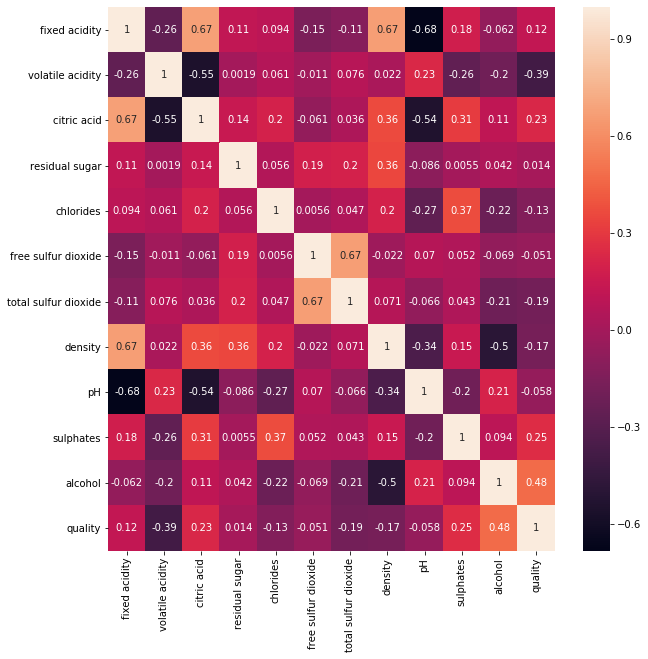

In [69]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [70]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

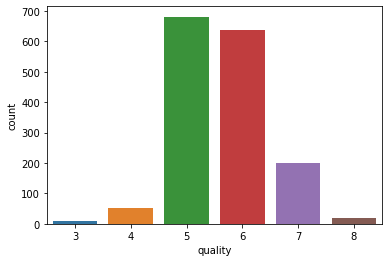

In [71]:
sns.countplot(x='quality', data=data)

In [0]:
y = []
for x in data['quality']:
  if(x<=5):
    y.append(0)
  else:
    y.append(1)

In [0]:
sc = StandardScaler()

In [0]:
x = sc.fit_transform(data)

In [75]:
print(x)

[[-0.52835961  0.96187667 -1.39147228 ... -0.57920652 -0.96024611
  -0.78782264]
 [-0.29854743  1.96744245 -1.39147228 ...  0.1289504  -0.58477711
  -0.78782264]
 [-0.29854743  1.29706527 -1.18607043 ... -0.04808883 -0.58477711
  -0.78782264]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.54204194  0.54162988
   0.45084835]
 [-1.39015528  0.65462046 -0.77526673 ...  0.30598963 -0.20930812
  -0.78782264]
 [-1.33270223 -1.21684919  1.02199944 ...  0.01092425  0.54162988
   0.45084835]]


In [0]:
x_train,x_test, y_train, y_test = train_test_split(x,y)

In [0]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
preds1 = lr.predict(x_test)

In [78]:
print(classification_report(y_test,preds1))
print(confusion_matrix(y_test,preds1))
print(accuracy_score(y_test,preds1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177
           1       1.00      1.00      1.00       223

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

[[177   0]
 [  0 223]]
1.0


In [79]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preds2 = dt.predict(x_test)
print(classification_report(y_test,preds2))
print(confusion_matrix(y_test,preds2))
print(accuracy_score(y_test,preds2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177
           1       1.00      1.00      1.00       223

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

[[177   0]
 [  0 223]]
1.0


In [80]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
preds3 = rf.predict(x_test)
print(classification_report(y_test,preds3))
print(confusion_matrix(y_test,preds3))
print(accuracy_score(y_test,preds3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177
           1       1.00      1.00      1.00       223

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

[[177   0]
 [  0 223]]
1.0
